In [55]:
# Manejo y visualización de datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Etiquetado 
from sklearn.preprocessing import LabelEncoder
# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# Train,test split
from sklearn.model_selection import train_test_split
# Metricas
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import classification_report
# Selección de variables y tuneo de hiperparametros
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
# Balanceo
from imblearn.over_sampling import SMOTE
# Validacion cruzaada
from sklearn.model_selection import cross_val_score
# Ignorar warning
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

%matplotlib inline

plt.style.use('seaborn')

## Rihcter's Prediction : Modeling earthquake damage

_Description of features:

* geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
* age (type: int): age of the building in years.
* area_percentage (type: int): normalized area of the building footprint.
* height_percentage (type: int): normalized height of the building footprint.
* land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
* foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
* roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
* ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
* other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* position (type: categorical): position of the building. Possible values: j, o, s, t.
* plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
count_families (type: int): number of families that live in the building.
has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
* has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
* has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
* has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
* has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

## Load Dataset

In [2]:
testRaw= pd.read_csv('./Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv')
print(f"Test has {testRaw.shape[0]} rows and {testRaw.shape[1]} features")

print('-'*100)
trainLabelRaw = pd.read_csv('./Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv')
trainRaw = pd.read_csv('./Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv')
# Joining the Target to the dataset
trainRaw["Target"] = trainLabelRaw.damage_grade

print(f"Train has {trainRaw.shape[0]} rows and {trainRaw.shape[1]} features")


Test has 86868 rows and 39 features
----------------------------------------------------------------------------------------------------
Train has 260601 rows and 40 features


In [3]:
trainLabelRaw.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


* 1 represents low damage
* 2 represents a medium amount of damage
* 3 represents almost complete destruction

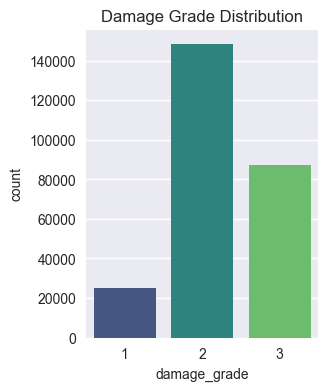

In [4]:
plt.figure(figsize=(3, 4)) 
sns.countplot(x="damage_grade",data = trainLabelRaw, palette="viridis")
plt.title("Damage Grade Distribution")
plt.show()



## EDA

In [5]:
varObj = trainRaw.Target
imputDep = trainRaw.copy()

In [6]:
# Supongamos que tienes un DataFrame llamado imputDep
# exploring the statstical fearures of train dataset.
imputDep.describe(include='int').T.astype(int).round(3).style.background_gradient(cmap='Set2',low =0.4,high=0.1,axis=0)



,count,mean,std,min,25%,50%,75%,max
building_id,260601,525675,304544,4,261190,525757,789762,1052934
geo_level_1_id,260601,13,8,0,7,12,21,30
geo_level_2_id,260601,701,412,0,350,702,1050,1427
geo_level_3_id,260601,6257,3646,0,3073,6270,9412,12567
count_floors_pre_eq,260601,2,0,1,2,2,2,9
age,260601,26,73,0,10,15,30,995
area_percentage,260601,8,4,1,5,7,9,100
height_percentage,260601,5,1,2,4,5,6,32
has_superstructure_adobe_mud,260601,0,0,0,0,0,0,1
has_superstructure_mud_mortar_stone,260601,0,0,0,1,1,1,1


In [7]:
imputDep.describe(include='object').T.style.background_gradient(cmap='Set2',low =0.4,high=0.1,axis=0)

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


In [8]:
# checking the types of varibles in the dataset(int,float,object)
dtypes=pd.DataFrame(trainRaw.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=trainRaw.nunique()
dtypes["Null Values"]=trainRaw.isnull().sum()
dtypes["% null Values"]=trainRaw.isnull().sum()/len(trainRaw)
dtypes.style.background_gradient(cmap='Set2',axis=0)    

,Data Type,Unique Values,Null Values,% null Values
building_id,int64,260601,0,0.000000
geo_level_1_id,int64,31,0,0.000000
geo_level_2_id,int64,1414,0,0.000000
geo_level_3_id,int64,11595,0,0.000000
count_floors_pre_eq,int64,9,0,0.000000
age,int64,42,0,0.000000
area_percentage,int64,84,0,0.000000
height_percentage,int64,27,0,0.000000
land_surface_condition,object,3,0,0.000000
foundation_type,object,5,0,0.000000


### Plot the features:

* Split the dataset into Numerical and Categorical features.

In [9]:
print("The Train Dataset has {} features".format(imputDep.shape[1]))

# generamos las listas con las variables categoricas.
categorical_lis = list(imputDep.select_dtypes(include='object'))
print("The categorical_lis has {} features".format(len(categorical_lis)))


# generamos las listas con las variables numericas
num_list = list(imputDep.select_dtypes(include='int'))
print("The num_list has {} features".format(len(num_list)))


The Train Dataset has 40 features
The categorical_lis has 8 features
The num_list has 32 features


In [10]:
categorical_lis

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [11]:
varObj = varObj.sort_values()

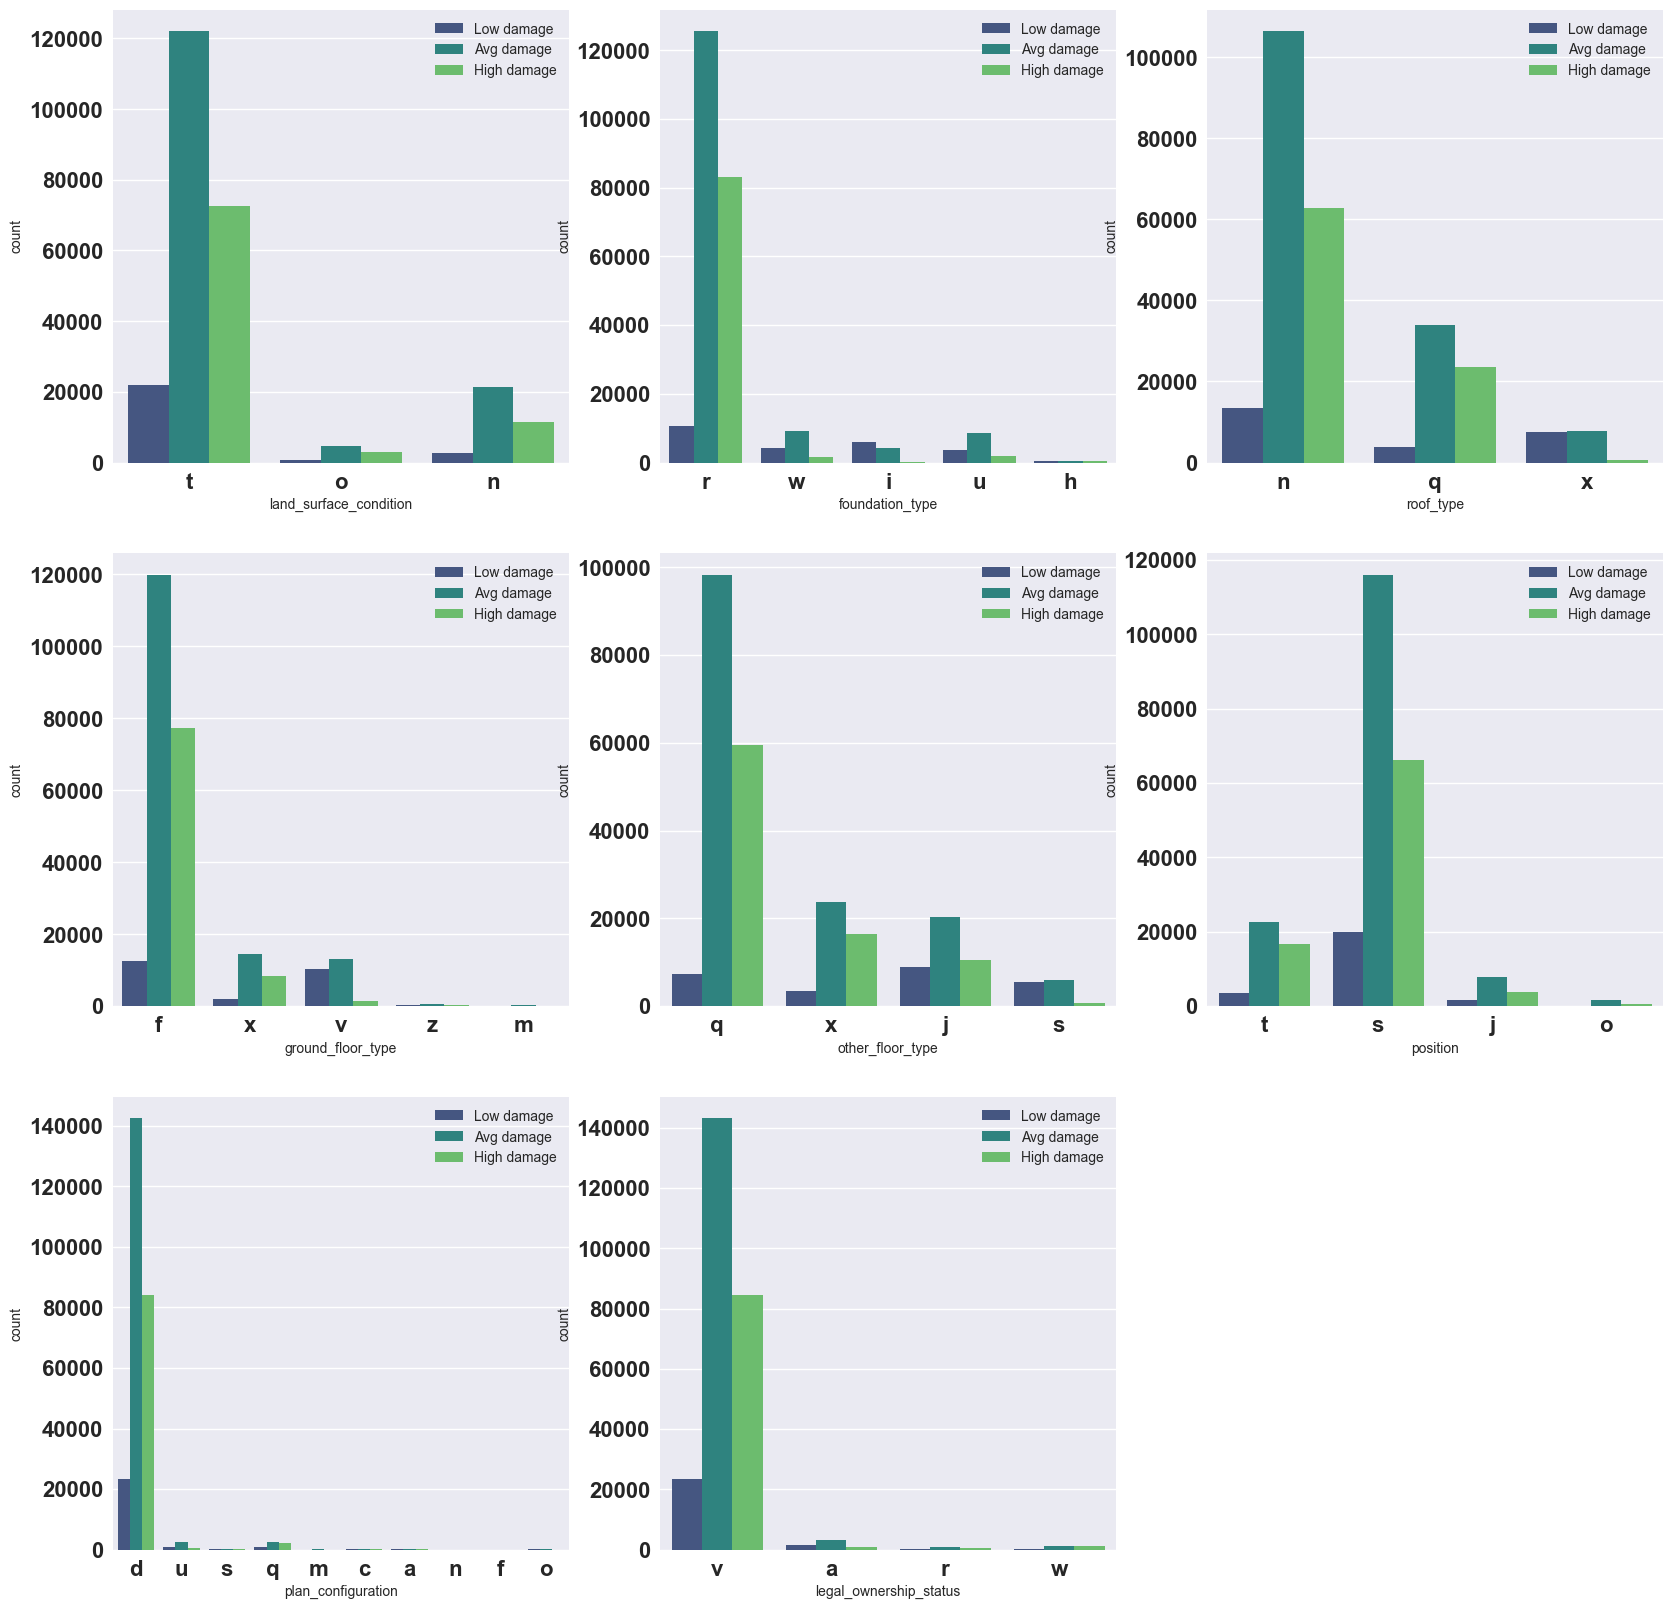

In [12]:
cat_cols=imputDep[categorical_lis]
font={'weight' : 'bold',
        'size': 16}       
q=1
plt.figure(figsize=(20,20))
for i in cat_cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(x=imputDep[i], hue=varObj, palette='viridis')
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(i)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
    if q > 9:  # Añadido para evitar un error cuando q es mayor que 9
        break
plt.show()

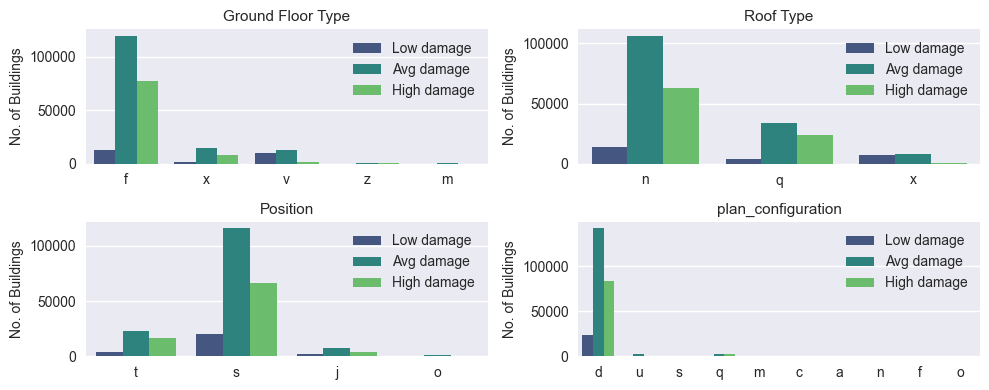

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con dos subgráficos en una fila
fig, axes = plt.subplots(2, 2, figsize=(10, 4))

# Gráfico 1 - ground_floor_type
sns.countplot(x=imputDep.ground_floor_type, hue=varObj, palette='viridis', ax=axes[0,0])
axes[0,0].set_ylabel("No. of Buildings")
axes[0,0].set_title("Ground Floor Type",fontsize=11)
axes[0,0].set_xlabel("")
axes[0,0].legend(["Low damage", "Avg damage", "High damage"], loc="upper right")
axes[0,0].tick_params(axis='x', rotation=0)

# Gráfico 2 - roof_type
sns.countplot(x=imputDep.roof_type, hue=varObj, palette='viridis', ax=axes[0,1])
axes[0,1].set_ylabel("No. of Buildings")
axes[0,1].set_title("Roof Type",fontsize=11)
axes[0,1].set_xlabel("")
axes[0,1].legend(["Low damage", "Avg damage", "High damage"], loc="upper right")
axes[0,1].tick_params(axis='x', rotation=0)


# Gráfico 3 - position
sns.countplot(x=imputDep.position, hue=varObj, palette='viridis', ax=axes[1,0])
axes[1,0].set_ylabel("No. of Buildings")
axes[1,0].set_title("Position",fontsize=11)
axes[1,0].set_xlabel("")
axes[1,0].legend(["Low damage", "Avg damage", "High damage"], loc="upper right")
axes[1,0].tick_params(axis='x', rotation=0)

# Gráfico 4 - plan_configuration
sns.countplot(x=imputDep.plan_configuration, hue=varObj, palette='viridis', ax=axes[1,1])
axes[1,1].set_ylabel("No. of Buildings")
axes[1,1].set_title("plan_configuration",fontsize=11)
axes[1,1].set_xlabel("")
axes[1,1].legend(["Low damage", "Avg damage", "High damage"], loc="upper right")
axes[1,1].tick_params(axis='x', rotation=0)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### Numerical features

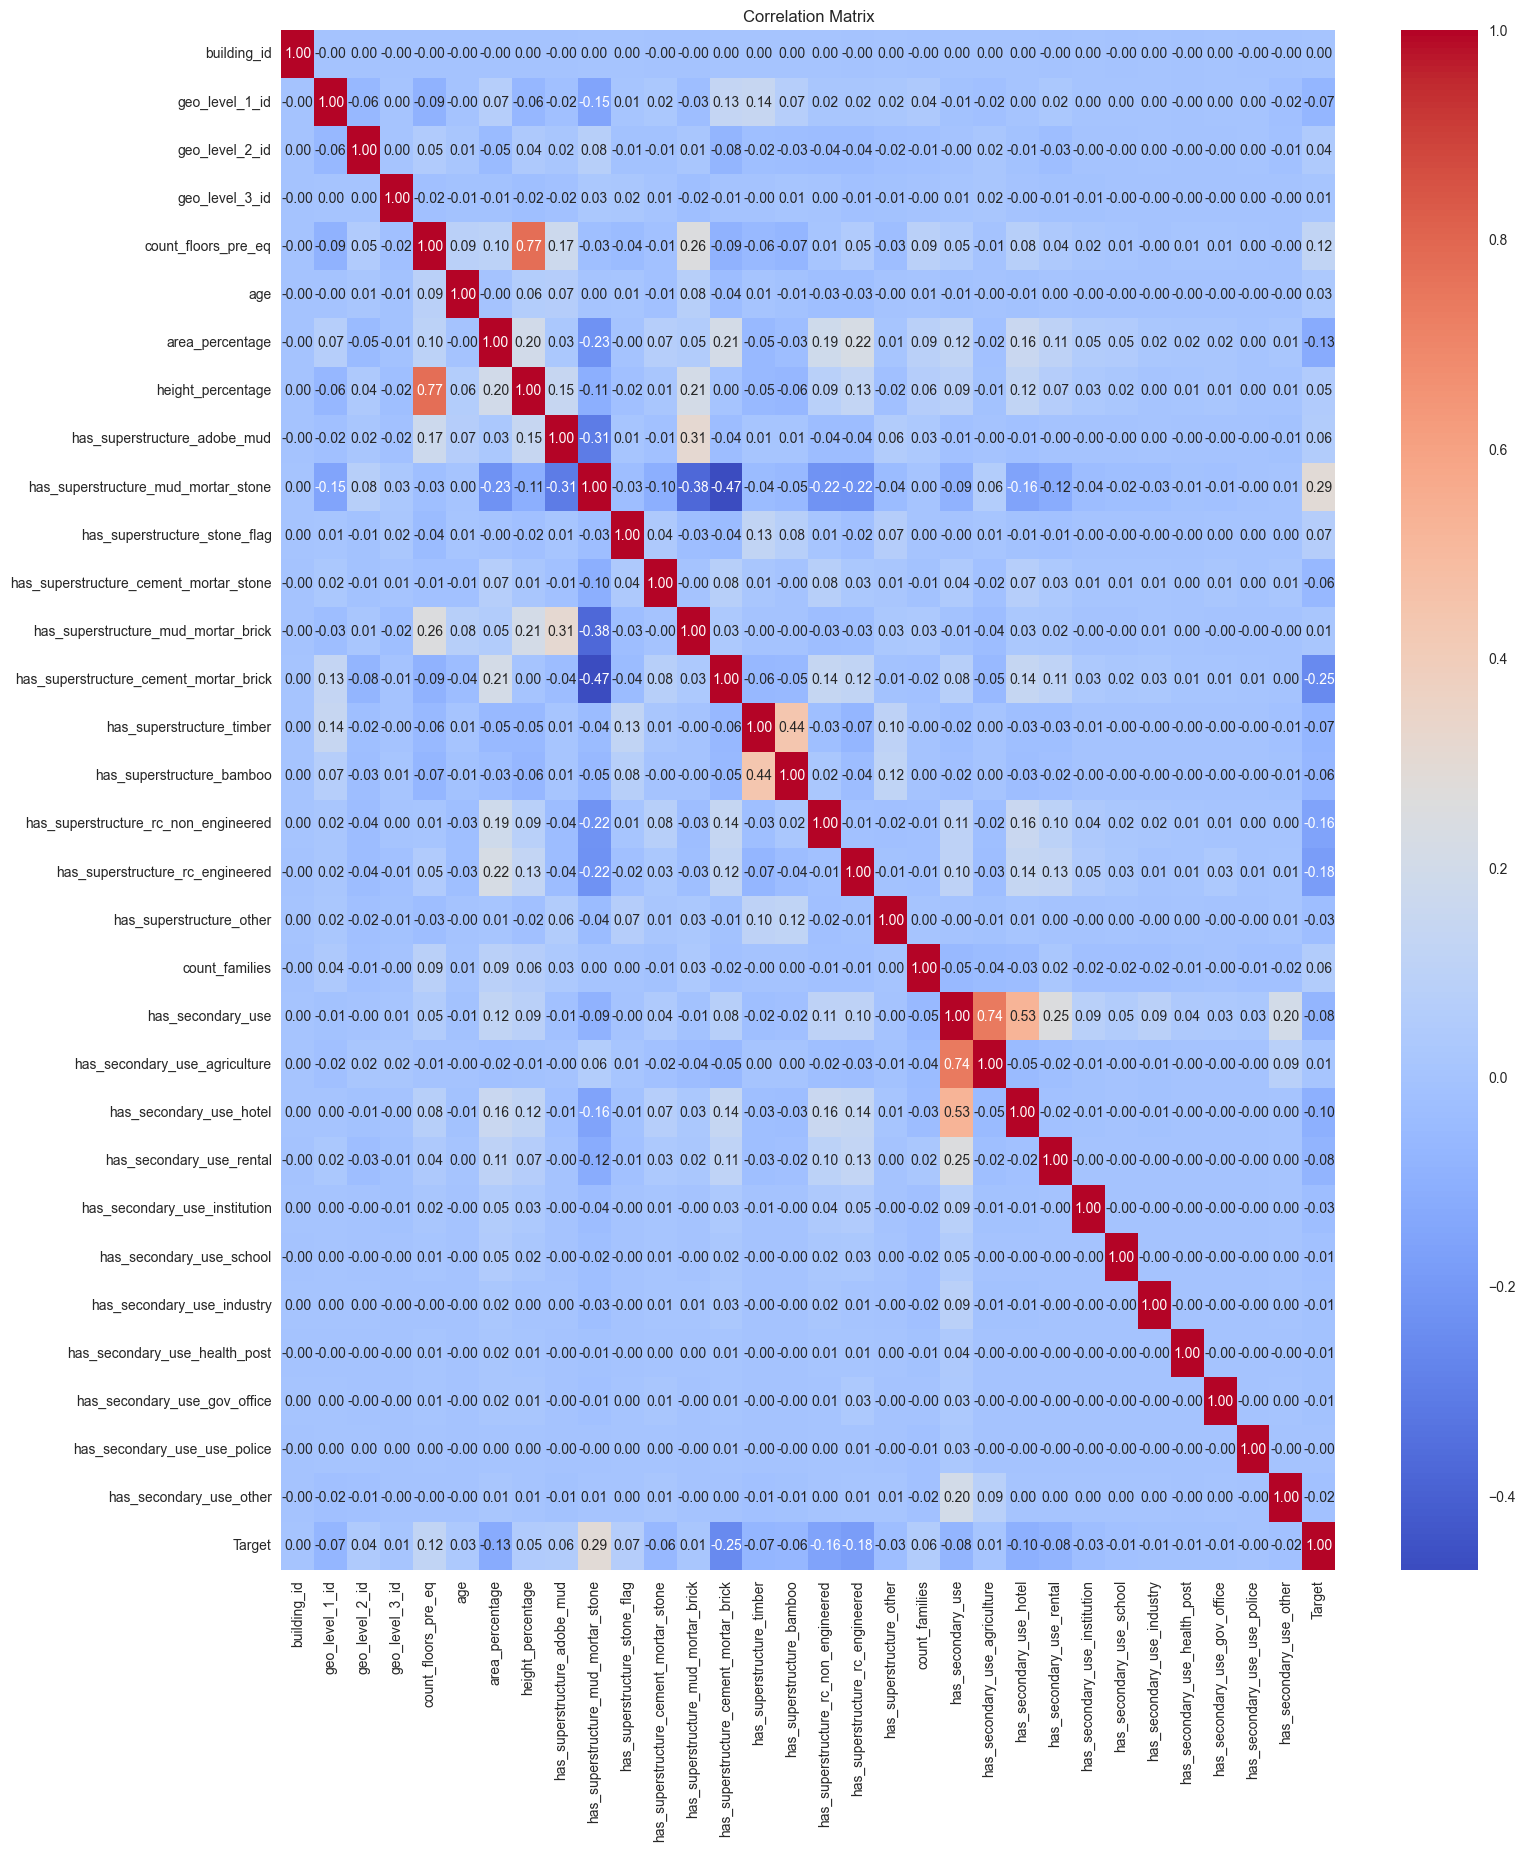

In [14]:
imputDep[num_list].corr()
plt.figure(figsize=(17, 20))
sns.heatmap(imputDep[num_list].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<Axes: >

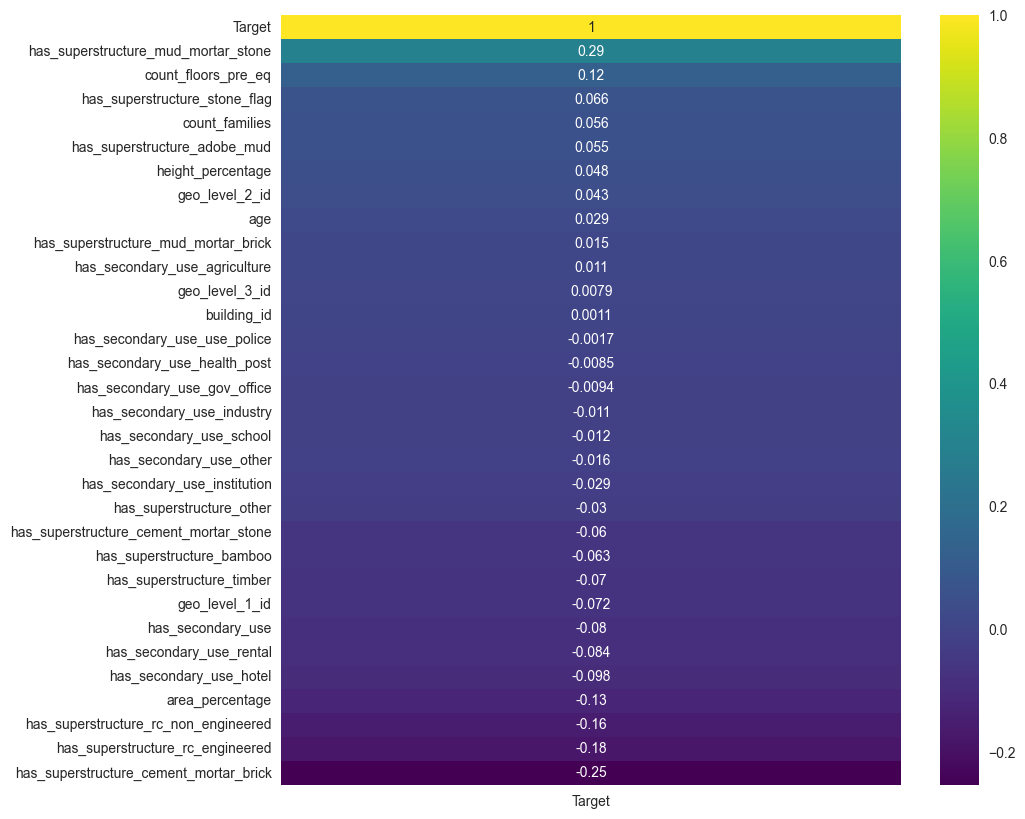

In [15]:
plt.figure(figsize=(10,10))
cor=imputDep.corr()["Target"].sort_values(ascending=False)
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")

In [20]:
trainRaw.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,Target
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


## LabelEncoder over Categorical Feature.

In [21]:
for i in trainRaw[categorical_lis]:
    le=LabelEncoder()
    le.fit(trainRaw[i].unique())
    trainRaw[i]=le.transform(trainRaw[i])

### Bulding Model

In [22]:


X_train, X_test, y_train, y_test = train_test_split(trainRaw.drop('Target',axis=1),
                                                    trainRaw.Target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = trainRaw.Target)

In [23]:
model1 = RandomForestClassifier().fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [24]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc) 

In [25]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.66      0.47      0.55      5025
           2       0.72      0.84      0.78     29652
           3       0.74      0.60      0.66     17444

    accuracy                           0.72     52121
   macro avg       0.71      0.64      0.66     52121
weighted avg       0.72      0.72      0.72     52121



## Without feature Has a secondary use

In [34]:


X_train, X_test, y_train, y_test = train_test_split(trainRaw.drop(['Target','has_secondary_use'],axis=1),
                                                    trainRaw.Target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = trainRaw.Target)

In [40]:
model2 = RandomForestClassifier().fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.67      0.47      0.55      5025
           2       0.73      0.84      0.78     29652
           3       0.74      0.60      0.66     17444

    accuracy                           0.73     52121
   macro avg       0.71      0.64      0.67     52121
weighted avg       0.73      0.73      0.72     52121



In [53]:
from sklearn import metrics
f1 = metrics.f1_score(y_test,y_pred1, average='weighted')
print("La medida F1 para el Primer Modelo con todas las Variables es %.4f"%(f1))
f1 = metrics.f1_score(y_test,y_pred2, average='weighted')
print("La medida F1 para el Segundo Modelo sin la variable --Has a secondary Use-- es %.4f"%(f1))




La medida F1 para el Primer Modelo con todas las Variables es 0.7177
La medida F1 para el Segundo Modelo sin la variable --Has a secondary Use-- es 0.7193


In [54]:
# Store the Kfold object
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kfold = KFold(n_splits=5, random_state=1989, shuffle = True)

In [56]:
# List of classification models
classifiers = [('KNN', KNeighborsClassifier(3)),
               ('RF', RandomForestClassifier()),
               ('GBM', GradientBoostingClassifier())]

# Evaluate each model
results = []
names = []
for name, model in classifiers:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_micro')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

KNN: 0.445601 (0.001543)
RF: 0.719844 (0.001938)
GBM: 0.680598 (0.002707)


F1 Score: 0.726041 


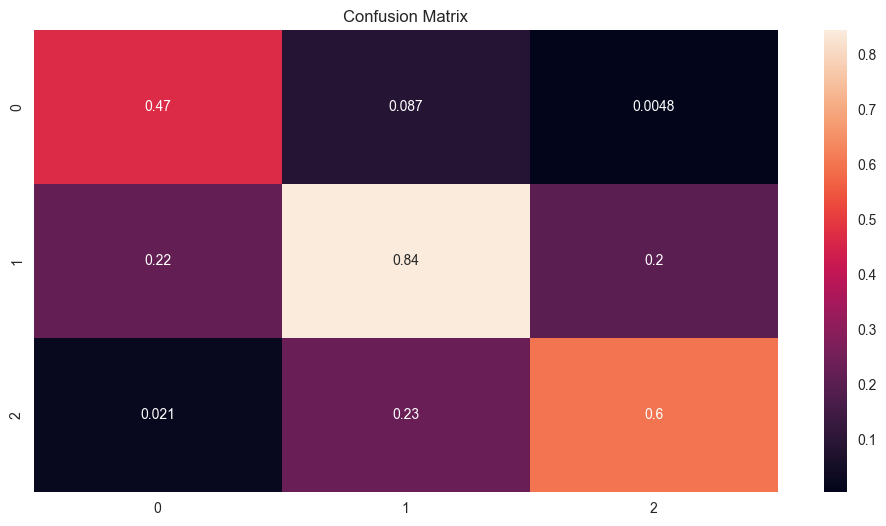

In [107]:
# Build the random forest on the full training data
rf = RandomForestClassifier() # instance
rf.fit(X_train, y_train) # fit model
y_pred_final = rf.predict(X_test) # predict on test

# Calculate confusion matrix
con_mat = confusion_matrix(y_test, y_pred_final)
con_mat = con_mat / con_mat.astype(np.float).sum(axis=1)

# Evaluate model
print("F1 Score: %f " % f1_score(y_test, y_pred_final,average='micro'))

# Plot Model
plt.figure(figsize = (12,6))
ax = sns.heatmap(con_mat, annot = True)
plt.title("Confusion Matrix")
plt.show()

# Clear objects


## Submission Format

In [108]:
test = testRaw.copy()

In [113]:
for i in test[categorical_lis]:
    le=LabelEncoder()
    le.fit(test[i].unique())
    test[i]=le.transform(test[i])

test.drop('has_secondary_use',axis=1,inplace=True)

In [114]:
#Predictions
predictions = rf.predict(test)

In [115]:
#Create Submission File
submission = pd.DataFrame()
submission["building_id"] = testRaw.building_id
submission["damage_grade"] = predictions
submission.head()
submission.to_csv("submission.csv", index=False)

1369 rank of 8000